In [95]:
import networkx as nx
import community # !pip install python-louvain
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

{'d': array([-0.57889375,  0.37184977]), 'a': array([-0.54722946, -0.28145184]), 'f': array([ 0.88354088, -0.15400839]), 'b': array([-1.        , -0.69186959]), 'c': array([0.44995361, 0.13964615]), 'e': array([0.79262873, 0.6158339 ])}


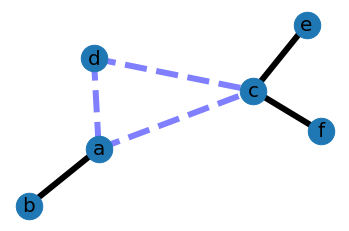

In [97]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes
print(pos)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [2]:
import collections
import pandas as pd
import numpy as np
import random
import re
import json
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from numpy import dot
from numpy.linalg import norm
# sklearn.feature_extraction.text.TfidfVectorizer

In [3]:
import pickle
import os
from IPython.display import display
import itertools
# /home/qibo/sms_nlp
res_root = '/home/qibo/sms_nlp/annotation_results/round_2_results_bank/'
# res_root = '/home/qibo/work_notebooks/sms_nlp/annotation_results/round_2_results_loan/'
ALL = []
for idx,fn in enumerate(os.listdir(res_root)):
    print(fn)
    despatcher = fn.split('.')[0]
    print(despatcher)
    with open(os.path.join(res_root, fn), 'rb') as fin:
        tasks = pickle.load(fin)

    for key, group in itertools.groupby(tasks, key=lambda x:x.output[0]):
#         print(list(group)[-2].output)
#         print('##############################')
#         print(list(group)[-1].output)
        regex_id = key
        to_display = None
        sms_type = None
        fields = []
        field_types = []
        for t in list(group):
            output = t.output
            val = t.value
            regex_id = output[0]
            group_id = output[1]
            gened_regex = output[2]
            box_markups = output[3]
            if group_id == 0:
                sms_type = val
                if sms_type:
                    print(regex_id, gened_regex)
                    print('短信类型: ', sms_type)
                to_display = box_markups[0][0]
                text = box_markups[0][0].text
#                 print('text :', text)
                spans = box_markups[0][0].spans
                for s in spans:
                    fields.append(text[s.start : s.stop])
            else:
                field_types.append(val)
        print(field_types)
        if None not in field_types:
            tem = {}
            for i , j in zip(fields, field_types):
                tem[i] = j
            new_text = 'Reg_id_' + str(regex_id) + ' ' + text
#             print(cluster_id)
            ALL.append([text, fields ,field_types, tem, sms_type])
        print('------------------------------------------------------')

indusb.pkl
indusb
3764 ^Dear Customer Txn on IndusInd Bank Credit Card no .* for INR .* on .* at .* is .* call 18602677777 for query\.Click on http\:\/\/bit\.ly\/2B8nSNl to update your Aadhaar Number\, ignore if already done\.$
短信类型:  交易流水＿转账
['银行卡号＿自己', '金额＿转出', '日期＿交易时间', '机构＿交易平台', 'other']
------------------------------------------------------
3765 ^Your IndusInd Bank A\/C .* has been debited for .* towards your Debit Card purchase\.The available Balance is .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额']
------------------------------------------------------
3766 ^Your a\/c no\. .* is credited by .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
3767 ^Your IndusInd Bank A\/C .* has been debited for .* towards an ATM Cash Withdrawal Transaction\. Available Balance is .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额']
------------------------------------------

[None, None, None, None]
------------------------------------------------------
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', None]
------------------------------------------------------
11107 ^Dear Customer\, acct .* has been debited for .* on .* towards linked .* UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
11108 ^Dear Customer\, Your a\/c no\. .* is credited by .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
['账户账号＿自己', '金额＿转出', None, None]
------------------------------------------------------
11110 ^Dear Customer\, your Account .* has been credited with INR .* on .* Info\: .* The Available Balance is INR .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', '金额＿余额']
------------------------------------------------------
11112 ^Dear Customer\, Your a\/c no\. .* is d

5587 ^Your a\/c no\. .* is debited .* on .* and a\/c linked to virtual address .* is credited \(UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
5588 ^Your a\/c no\. .* is credited .* on .* by a\/c linked to virtual address .* \(UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
[None, None, None, None, None, None]
------------------------------------------------------
5590 ^Your a\/c no\. .* is credited for .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
5592 ^Cash withdrawal of .* made on Kotak Debit card .* on .* at .* balance in A\/c .* is Rs .*$
短信类型:  交易流水＿转账
['金额＿转出', '银行卡号＿自己', '日期＿交易时间', 'other', '账户账号＿自己', '金额＿余额']
------------------------------------------------------
5593 ^Your a\

[None, None, None, None, None, None]
------------------------------------------------------
[None, None, None, None, None, None]
------------------------------------------------------
[None, None, None, None, None, None]
------------------------------------------------------
1806 ^Your a\/c no\. .* is debited for .* on .* and a\/c .* credited \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
1807 ^Cash deposit of INR .* on .* made in A\/c .* at PMC Bank\. Clr Bal\:INR .* Eff Avail Bal\:INR .*$
短信类型:  交易流水＿转账
['金额＿转入', '日期＿交易时间', '账户账号＿自己', '金额＿信用额度', '金额＿余额']
------------------------------------------------------
1808 ^Your a\/c no\. .* is credited for .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
1811 ^Your a\/c no\. .* is debited for .* on .* and credited to VPA .* \

6991 ^Please note that 90\% of the Credit Line of .* on your Credit Card Number .* has been utilised\.$
短信类型:  sms_other
['other', 'other']
------------------------------------------------------
6993 ^Your ECS request dated .* towards .* for Rs\. .* from your Citi account .* was dishonored\. Reason \: PAYMENT STOPPED BY DRAWER$
短信类型:  账号异常＿扣款失败
['日期＿交易时间', '机构＿交易平台', '金额＿转出', '账户账号＿自己']
------------------------------------------------------
6994 ^Dear Customer\, your a\/c ending .* has been charged with Rs\. .* for not meeting the average Net Relationship Value \(NRV\) threshold of Rs\. .* in .* Kindly increase your NRV from the current Rs\. .* to avoid charges next month\. For details on charges\, please refer to the email sent to your registered email\-ID or visit www\.citi\.co\.in\/nrvfaq\.htm$
短信类型:  sms_other
['other', 'other', 'other', 'other', 'other']
------------------------------------------------------
6995 ^Dear Customer\, for your Citibank a\/c ending .* kindly increase yo

2988 ^Your a\/c no\. .* is debited .* on .* and a\/c linked to virtual address .* is credited \(UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
2989 ^Your a\/c no\. .* is credited for .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
2990 ^Your a\/c no\. .* is credited .* on .* by a\/c linked to virtual address .* \(UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
2991 ^Cash withdrawal of .* made on Kotak Debit card .* on .* at .* balance in A\/c .* is Rs .*$
短信类型:  交易流水＿转账
['金额＿转出', '银行卡号＿自己', '日期＿交易时间', 'other', '账户账号＿自己', '金额＿余额']
------------------------------------------------------
2992 ^Your a\/c no\. .* is debited for .* on .* and a\/c .* credited \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账

[None, None, None, None]
------------------------------------------------------
2400 ^A\/c .* debited by Rs\. .* Total Bal\: Rs\. .* CR Clr Bal\: Rs\. .* CR\. Change your ATM\/Debit Card PIN periodically$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额', 'other']
------------------------------------------------------
2402 ^Your A\/c .* is debited by Rs\. .* Bal after Debit is Rs\. .* CR\.MINIMUM BAL NOT MAINTAINED\.PL FUND YOUR A\/C\. \-Central Bank of India$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额']
------------------------------------------------------
['账户账号＿自己', None, None, None, None, None]
------------------------------------------------------
[None, None, None, None]
------------------------------------------------------
2406 ^Your A\/c No\. .* is debited for Rs\. .* on .* and .* credited \( IMPS Ref No\. .* \)\.$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
2407 ^Your VPA .* linked to Central Bank of Ind

[None, None, None, None, None]
------------------------------------------------------
3912 ^Your A\/C .* Credited INR .* on .* \-Deposit of Cash at .* ATM\. A\/c Balance INR .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', '金额＿余额']
------------------------------------------------------
3913 ^Your A\/C .* Credited INR .* on .* \-Deposit by transfer from .* A\/C Bal INR .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', '金额＿余额']
------------------------------------------------------
3914 ^Your A\/C .* has a credit by .* of Rs .* on .* Avl Bal Rs .* Download YONO \@ www\.yonosbi\.com$
短信类型:  交易流水＿转账
['账户账号＿自己', 'other', '金额＿转入', '日期＿交易时间', '金额＿余额']
------------------------------------------------------
[None, None, None, None]
------------------------------------------------------
3916 ^Your A\/C .* Debited INR .* on .* \-Transferred to INVESTMENT INTERMEDI\. A\/C Balance INR .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '金额＿余额']
----------------------------------

5174 ^A charge of Rs\. .* has been initiated on your RBL Credit Card ending with .* at .* on .* at .* IST\. Your available limit is Rs\. .*$
短信类型:  交易流水＿转账
['金额＿转出', '银行卡号＿自己', '机构＿交易平台', '日期＿交易时间', 'other', '金额＿信用额度']
------------------------------------------------------
5176 ^INR .* debited from a\/c .* on .* by use of Card no ending .* at .* Avail Bal .* For assistance call 18001238040$
短信类型:  交易流水＿转账
['金额＿转出', '账户账号＿自己', '日期＿还款日期', '银行卡号＿自己', '机构＿交易平台', '金额＿余额']
------------------------------------------------------
5177 ^Dear .* Transfer of .* to .* has been successful with REF .*$
短信类型:  交易流水＿转账
['other', '金额＿转出', '机构＿交易平台', 'other']
------------------------------------------------------
5180 ^Your a\/c no\. .* is debited for .* on .* and credited to a\/c no\. .* \(UPI Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
5182 ^Dear Cardmember\, payment of .* has been received towards your RBL Bank Cr

[None, None, None, None, None]
------------------------------------------------------
232 ^Your A\/c .* is debited with INR .* on .* A\/c Bal is INR .* Info\: .* Call 18605005555 \(if in India\) if you have not done this transaction\.$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '金额＿余额', 'other']
------------------------------------------------------
233 ^Balance in savings a\/c .* as of .* EOD is INR .* Credits in a\/c are subject to clearing\.$
短信类型:  交易流水＿余额
['账户账号＿自己', '日期＿交易时间', '金额＿余额']
------------------------------------------------------
234 ^Your a\/c no\. .* is debited for .* on .* and a\/c of .* has been credited \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
237 ^Hello\! Your A\/c no\. .* has been debited by Rs\. .* on .* The A\/c balance is Rs\. .* Info\: .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '金额＿余额', 'other']
------------------------------------------------------
23

短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
7225 ^Your a\/c no\. .* is credited by .* on .* by a\/c linked to mobile .* \(IMPS Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', '账户账号＿他人', 'other']
------------------------------------------------------
7228 ^Available bal\. as on .* IST A\/c .* INR .* Canara Bank$
短信类型:  交易流水＿余额
['日期＿交易时间', '账户账号＿自己', '金额＿余额']
------------------------------------------------------
7232 ^An amount of INR .* has been CREDITED to your account .* on .* towards .* Total Avail\.bal INR .*$
短信类型:  交易流水＿转账
['金额＿转入', '账户账号＿自己', '日期＿交易时间', 'other', '金额＿余额']
------------------------------------------------------
[None, None, None, None, None]
------------------------------------------------------
7235 ^An amount of INR .* has been CREDITED to .* on .* towards NEFT Ref No\. .* Avail\.bal INR .*$
短信类型:  交易流水＿转账
['金额＿转入', '账户账号＿自己', '日期＿交易时间', 'other', '金额＿余额']
---------------------

2270 ^Your a\/c no\. .* is debited by .* on .* and credited to .* Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
2271 ^Your A\/c .* is debited through ATM Card by Rs\. .* Total Bal \: Rs\. .* CR Clr Bal \: Rs\. .* CR .* \-\- .* \- ALB$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额', '金额＿余额', '日期＿交易时间', '日期＿交易时间']
------------------------------------------------------
2273 ^Your a\/c no\. .* is credited by .* on .* sent by .* Ref no .*$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转入', '日期＿交易时间', 'other', 'other']
------------------------------------------------------
[None, None, None, None, None, None, None]
------------------------------------------------------
2275 ^Your A\/c .* is debited through ATM by Rs\. .* Total Bal \: Rs\. .* CR Clr Bal \: Rs\. .* CR .* \-\- .* \- ALB$
短信类型:  交易流水＿转账
['账户账号＿自己', '金额＿转出', '金额＿余额', '金额＿余额', '日期＿交易时间', '日期＿交易时间']
------------------------------------------------------
2276 ^Your A

In [4]:
DF = pd.DataFrame()
for tt in ALL:
    DF_tmp = pd.DataFrame()
    length = len(tt[0].split(' '))
    DF_tmp['token'] = tt[0].split(' ')
    DF_tmp['lable'] = DF_tmp.token.apply(lambda x: tt[3][x] if x in tt[3] else np.nan)
    DF_tmp['sent_id'] = [tt[0].split(' ')[i] if i==0 else np.nan for i in range(len(DF_tmp))]
    DF_tmp['cls'] = [tt[4]]*length
    DF_tmp.sent_id=DF_tmp.sent_id.fillna(method='ffill')
    DF = DF.append(DF_tmp)

DF = DF.fillna(value='other')

DF['sent_id'] = ['sent_' if i == 0 else np.nan for i in DF.index]
DF['idx_num'] = range(DF.shape[0])
DF['sent_id'] = DF.apply(lambda x: str(x.sent_id) + str(x.idx_num), axis=1)
DF['sent_id'] = DF.sent_id.apply(lambda x: x if x.startswith('sent') else np.nan)
DF.sent_id = DF.sent_id.fillna(method='ffill')
DF = DF.drop(['idx_num'], axis=1)
DF = DF[DF.cls != False]

In [5]:
# 先切出来一个测试集；（100）
test_id = DF.sent_id.sample(100)
Test_set = DF[DF.sent_id.isin(test_id)]
DF = DF[~DF.sent_id.isin(test_id)]

In [6]:
import pandas as pd
import random

def gen_new(ori_str):
    return ''.join([str(random.randint(0,9)) if i.isdigit() else i for i in list(ori_str)])

def create_fake_label(DF, fake_times):
    DF2 = DF.copy()
    for i in range(fake_times):
        col = DF2.apply(lambda x: gen_new(x.token) if x.lable!='other' else x.token, axis=1)
        DF2['new_tokens_{}'.format(i)] = col
    return DF2

def generate_sent_id(sent_id_list, origin_sent_id):
    dic = {}
    for k in origin_sent_id:
        tmp = 'send_id_' + str(sent_id_list[-1])
        sent_id_list.pop()
        dic.setdefault(k, tmp)
    return sent_id_list, dic

def fake2real(df, fake_times):
    '''label 写错了，将错就错'''
    lis = []
    sent_id_list = list(range(len(df.sent_id.unique()) * fake_times))
    origin_sent_id = df.sent_id.unique()
    for i in range(fake_times):
        tmp_df = df[['new_tokens_{}'.format(i), 'lable', 'sent_id']]
        tmp_df.columns = ['token', 'lable', 'sent_id']
        sent_id_list, dic = generate_sent_id(sent_id_list, origin_sent_id)
        tmp_df.sent_id = tmp_df.sent_id.map(dic)
        lis.append(tmp_df)
    return pd.concat(lis)

def fake2real_v2(df, fake_times):
    lis = []
    sent_id_list = list(range(len(df.sent_id.unique()) * fake_times))
    origin_sent_id = df.sent_id.unique()
    for i in range(fake_times):
        tmp_df = df[['new_tokens_{}'.format(i), 'sent_id', 'cls']]
        tmp_df.columns = ['token', 'sent_id', 'cls']
        sent_id_list, dic = generate_sent_id(sent_id_list, origin_sent_id)
        tmp_df.sent_id = tmp_df.sent_id.map(dic)
        lis.append(tmp_df)
    return pd.concat(lis)

In [7]:
## 造假n倍
dupli = 20
DF = DF[DF.cls != False]
df = create_fake_label(DF, dupli)
df2 = fake2real_v2(df, dupli)

In [8]:
sms = df2.groupby('sent_id').apply(lambda x: ' '.join(x.token.tolist()).lower())
cls = df2.groupby('sent_id').apply(lambda x: x.cls[0])
df3 = pd.DataFrame(columns=['sms', 'cls'])
df3.sms = sms
df3.cls = cls

In [9]:
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

def sample_baseon_cls(df, split_rate = 0.2):
    '''
    train test split based on diff cls;
    df with type: 
        ##......sms.......#......cls......##
        ##'sms example 1.'#  交易流水＿转账 ##
        ##'sms example 2.'#  交易流水＿转账 ##
        ##'sms example 3.'#  交易流水＿余额 ##
        ##'sms example 4.'#  交易流水＿其他 ##
    '''
    test_idx_list = []
    classes = set(df.cls)
    labels = df.cls
    for i in classes:
        sample_all_idxs = np.where(labels==i)[0]
        num_samples = int(split_rate*len(sample_all_idxs))
        if num_samples == 0:
            print('Warning! MAKE SURE U HAVE SUFFICIENT SAMPLES FOR CLASS :{}'.format(i))
        sample_idxs = np.random.choice(sample_all_idxs, size = num_samples)
        print('class_name:{}, num_samples:{}, num_test_sample:{}'.format(i, len(sample_all_idxs), len(sample_idxs)))
        test_idx_list.append(sample_idxs)
    test_idx_list = list(flatten(test_idx_list))
    df.index = range(len(df))
    test = df[df.index.isin(test_idx_list)]
    train = df[~df.index.isin(test_idx_list)]
    return train, test

In [10]:
train, test = sample_baseon_cls(df3)

class_name:交易流水＿余额, num_samples:1140, num_test_sample:228
class_name:交易流水＿转账, num_samples:14100, num_test_sample:2820
class_name:贷前申请＿申请交互, num_samples:240, num_test_sample:48
class_name:账号异常＿卡号冻结, num_samples:380, num_test_sample:76
class_name:账号异常＿扣款失败, num_samples:1220, num_test_sample:244
class_name:贷前申请＿审核拒绝, num_samples:80, num_test_sample:16
class_name:sms_other, num_samples:800, num_test_sample:160
class_name:贷后提醒＿成功放款, num_samples:80, num_test_sample:16
class_name:信用卡＿逾期警告, num_samples:340, num_test_sample:68
class_name:账号异常＿余额不足, num_samples:1220, num_test_sample:244
class_name:信用卡＿还款提醒, num_samples:1440, num_test_sample:288
class_name:贷后提醒＿到期提醒, num_samples:440, num_test_sample:88
class_name:贷后提醒＿逾期催收, num_samples:380, num_test_sample:76
class_name:贷前申请＿审核通过, num_samples:140, num_test_sample:28
class_name:账号异常＿信用额度不足, num_samples:20, num_test_sample:4
class_name:账户账号＿自己, num_samples:20, num_test_sample:4
class_name:信用卡＿申请失败, num_samples:40, num_test_sample:8
class_name:other

In [79]:
gsm_templates_df = pd.read_csv('gsm_templates_df.csv')
example = gsm_templates_df.sample(n=5).sms.tolist()

In [26]:
def get_cos_similarity(sms, templates):
    '''计算一条新sms 与 每个template 相似度;'''
    def cos_sim(a, b):
        return dot(a, b) / (norm(a) * norm(b))
    return [cos_sim(i, sms) for i in templates]

def tfIdfVector(corpus):
    '''corpus is a list of sentences:
    ['This is an example', 'hello world', ...]
    '''
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    x = vectorizer.fit_transform(corpus)
    tfidf = transformer.fit_transform(x)
    return tfidf.toarray()

In [22]:
sms  = example[:2]

In [80]:
corpus, labels = gsm_templates_df.sms.tolist(), gsm_templates_df.label.tolist()

In [81]:
num_sms = len(sms)
for single in sms:
    corpus.append(single.lower())
all_tfidf = tfIdfVector(corpus)
template_tfidf = all_tfidf[:-num_sms]
instances_tfidf = all_tfidf[-num_sms:]


In [84]:
template_tfidf.shape
leng = template_tfidf.shape[0]

In [83]:
instances_tfidf.shape

(2, 4248)

In [64]:
s = [0.5,0.8,0.7]
# sss = list(zip(enumerate(s)))

In [68]:
sorted(enumerate(s), key=lambda x: x[1], reverse=True)

[(1, 0.8), (2, 0.7), (0, 0.5)]

In [90]:
sms

['dear customer, your a/c no. xxxxxxxx4397 is debited for rs.100.00 on 23-09-18 and a/c xxxxxxxx1930 credited (imps ref no 826613753432).',
 'a charge of rs. 5000.00 has been initiated on your rbl credit card ending with 0223 at payzapp wallet load on 03/09/18 at 02:07 pm ist. your card is over limit.']

In [ ]:
def simi_input()

In [88]:
result = []
leng = template_tfidf.shape[0]
for idx, single_sms in enumerate(instances_tfidf):  
    cos_score = get_cos_similarity(single_sms, template_tfidf)
    sorted_score = sorted(enumerate(cos_score), key=lambda x: x[1], reverse=True)
    idx = [labels[i[0]] for i in sorted_score[:5] if i[0]<leng-1]
    print(sorted_score[:5], idx)
    max_score = np.max(cos_score)
    print(max_score)

    label = labels[np.argmax(cos_score)]
#     result.append([sms[idx], label, max_score])


[(48, 1.0000000000000002), (514, 0.35399982758521437), (1027, 0.35345138191257347), (193, 0.322466662589269), (747, 0.31721394654113055)] ['交易流水＿转账', '交易流水＿转账', '交易流水＿转账', '交易流水＿转账', '交易流水＿转账']
1.0000000000000002
[(840, 1.0), (415, 0.4661372169164977), (1082, 0.46038234670688477), (821, 0.45593656221292933), (846, 0.39064452694773166)] ['账号异常＿余额不足', '账号异常＿信用额度不足', '交易流水＿转账', '交易流水＿转账', '交易流水＿转账']
1.0


In [39]:
result

[['dear customer, your a/c no. xxxxxxxx4397 is debited for rs.100.00 on 23-09-18 and a/c xxxxxxxx1930 credited (imps ref no 826613753432).',
  '交易流水＿转账',
  1.0000000000000002],
 ['a charge of rs. 5000.00 has been initiated on your rbl credit card ending with 0223 at payzapp wallet load on 03/09/18 at 02:07 pm ist. your card is over limit.',
  '账号异常＿余额不足',
  1.0000000000000002]]

In [28]:
get_cos_similarity(instances_tfidf, template_tfidf)

ValueError: shapes (4248,) and (2,4248) not aligned: 4248 (dim 0) != 2 (dim 0)

In [14]:
gsm_templates_df

,sms,label
0,dear customer txn on indusind bank credit card...,交易流水＿转账
1,your indusind bank a/c no.100***942932 has bee...,交易流水＿转账
2,your a/c no. xxxxxxxxxx9359 is credited by rs....,交易流水＿转账
3,your indusind bank a/c no.159***479359 has bee...,交易流水＿转账
4,your a/c no. xxxxxxxxxx2932 is debited for rs....,交易流水＿转账
5,"dear customer, your account no 100***942932 ha...",交易流水＿转账
6,"dear customer, thank you for your internet pay...",交易流水＿转账
7,"dear customer, statement for your indusind ban...",信用卡＿还款提醒
8,your curr loan emi rs.2865 for ahb00485s due o...,贷后提醒＿逾期催收
9,your a/c no. xxxxxx2932 is credited for rs. 30...,交易流水＿转账


In [10]:
train.shape

(18040, 2)

In [11]:
test.shape

(3980, 2)

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [86]:
train.columns

Index(['sms', 'cls'], dtype='object')

In [91]:
import sklearn

In [94]:
vect = TfidfVectorizer(stop_words='english', token_pattern=r'\b\w{2,}\b',
                       min_df=1, max_df=0.1, ngram_range=(1,2))
mnb = MultinomialNB(alpha=2)
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, random_state=42)
mnb_pipeline = make_pipeline(vect, mnb)
svm_pipeline = make_pipeline(vect, svm)
mnb_cv = cross_val_score(mnb_pipeline, train.sms, train.cls, scoring='accuracy', cv=10, n_jobs=-1)
svm_cv = cross_val_score(svm_pipeline, train.sms, train.cls, scoring='accuracy', cv=10, n_jobs=-1)
print('\nMultinomialNB Classifier\'s Accuracy: %0.5f\n' % mnb_cv.mean())
print('\nSVM Classifier\'s Accuracy: %0.5f\n' % svm_cv.mean())


MultinomialNB Classifier's Accuracy: 0.63303


SVM Classifier's Accuracy: 0.88594



In [101]:
num_labels

18

In [12]:
# 导入使用到的库
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Convolution1D, Flatten, Dropout, MaxPool1D, GlobalAveragePooling1D
from keras.layers import LSTM, GRU, TimeDistributed, Bidirectional,BatchNormalization

from keras.utils.np_utils import to_categorical
from keras import initializers
from keras import backend as K
import keras
from keras.engine.topology import Layer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# 划分训练/测试集
X_train, X_test, y_train, y_test = train.sms, test.sms, train.cls, test.cls

# 对类别变量进行编码，共10类
y_labels = list(y_train.value_counts().index)
le = preprocessing.LabelEncoder()
le.fit(y_labels)
num_labels = len(y_labels)
y_train = to_categorical(y_train.map(lambda x: le.transform([x])[0]), num_labels)
y_test = to_categorical(y_test.map(lambda x: le.transform([x])[0]), num_labels)

# 分词，构建单词-id词典       
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
tokenizer.fit_on_texts(train.sms)
vocab = tokenizer.word_index

# 将每个词用词典中的数值代替
X_train_word_ids = tokenizer.texts_to_sequences(X_train)
X_test_word_ids = tokenizer.texts_to_sequences(X_test)

# # One-hot
# x_train = tokenizer.sequences_to_matrix(X_train_word_ids, mode='binary')
# x_test = tokenizer.sequences_to_matrix(X_test_word_ids, mode='binary')

# 序列模式
maxlen = 30
x_train = pad_sequences(X_train_word_ids, maxlen=maxlen)
x_test = pad_sequences(X_test_word_ids, maxlen=maxlen)

Using TensorFlow backend.


In [13]:
x_test.shape

(3980, 30)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 300)           7649400   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 30, 512)           855552    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dense_4 (Dense)              (None, 18)                9234      
Total params: 9,695,370
Trainable params: 9,695,370
Non-trainable params: 0
_________________________________________________________________
Train on 18010 samples, validate on 3970 samples
Epoch 1/30
18010/18010 [==============================] - 28s 2ms/step - loss: 1.0623 - acc: 0.7223 - val_loss: 0.4005 - val_acc: 0.8751
Epoch 2/30
18010/18010 [==============================] - 25s 1ms/step - loss:

AttributeError: 'AxesSubplot' object has no attribute 'show'

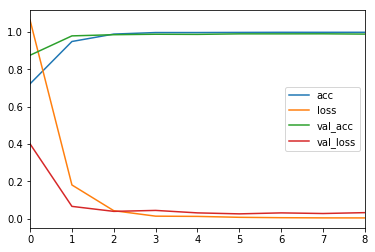

In [18]:
# 模型结构：词嵌入-双向GRU*2-全连接
model = Sequential()
model.add(Embedding(len(vocab)+1, 300, input_length=maxlen))
model.add(Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1, return_sequences=True)))
model.add(Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1)))
model.add(Dense(num_labels, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping 

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    verbose=0, 
    mode='auto')


history = model.fit(x_train, y_train,
          callbacks=[early_stopping],
          batch_size=300,
          epochs=30,
          validation_data=(x_test, y_test))
pd.DataFrame.from_dict(history.history).plot().show()

In [18]:
def cal_acc(pred, label):
    l = [np.argmax(i) for i in label]
    p = pred.argmax(axis = -1)
    acc =  sum((l == p)*1)/(len(l))
    return acc

In [109]:
sms_T = Test_set.groupby('sent_id').apply(lambda x: ' '.join(x.token.tolist()).lower())
cls_T = Test_set.groupby('sent_id').apply(lambda x: x.cls[0])
df_T = pd.DataFrame(columns=['sms', 'cls'])
df_T.sms = sms_T
df_T.cls = cls_T

TEST_Y = to_categorical(df_T.cls.map(lambda x: le.transform([x])[0]), num_labels)

# 将每个词用词典中的数值代替
X_test_word_id_T = tokenizer.texts_to_sequences(df_T.sms)

# 序列模式
maxlen = 30
x_test_TT = pad_sequences(X_test_word_id_T, maxlen=maxlen)
pred = model.predict(x_test_TT)
cal_acc(pred, TEST_Y)

0.711340206185567

In [14]:
# 模型结构：嵌入-卷积池化*2-dropout-BN-全连接-dropout-全连接
model = Sequential()
model.add(Embedding(len(vocab)+1, 300, input_length = maxlen))
model.add(Convolution1D(256, 3, padding='same'))
model.add(MaxPool1D(3,3,padding='same'))
model.add(Convolution1D(128, 3, padding='same'))
model.add(MaxPool1D(3,3,padding='same'))
model.add(Convolution1D(64, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(BatchNormalization()) # (批)规范化层
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_labels,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping 

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    verbose=0, 
    mode='auto')


history = model.fit(x_train, y_train,
          callbacks=[early_stopping],
          batch_size=300,
          epochs=30,
          validation_data=(x_test, y_test))
pd.DataFrame.from_dict(history.history).plot().show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           7707600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 256)           230656    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           98432     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)    

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [19]:
sms_T = Test_set.groupby('sent_id').apply(lambda x: ' '.join(x.token.tolist()).lower())
cls_T = Test_set.groupby('sent_id').apply(lambda x: x.cls[0])
df_T = pd.DataFrame(columns=['sms', 'cls'])
df_T.sms = sms_T
df_T.cls = cls_T

TEST_Y = to_categorical(df_T.cls.map(lambda x: le.transform([x])[0]), num_labels)

# 将每个词用词典中的数值代替
X_test_word_id_T = tokenizer.texts_to_sequences(df_T.sms)

# 序列模式
maxlen = 30
x_test_TT = pad_sequences(X_test_word_id_T, maxlen=maxlen)
pred = model.predict(x_test_TT)
cal_acc(pred, TEST_Y)

0.6526315789473685

In [22]:
p = np.argmax(pred, axis=1)

In [23]:
l = [np.argmax(i) for i in TEST_Y]

In [20]:
from sklearn.metrics import confusion_matrix 

In [25]:
confusion_matrix(l,p)

array([[ 0,  0,  2,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  2, 11,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  4,  0,  2,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0]])

In [26]:
from sklearn.metrics import classification_report

In [33]:
rpt = classification_report(l, p)

In [34]:
type(rpt)

str

In [43]:
''.join(rpt).strip().split('\n')

['precision    recall  f1-score   support',
 '',
 '           1       0.00      0.00      0.00         4',
 '           2       1.00      0.25      0.40         4',
 '           3       0.75      0.96      0.84        47',
 '           5       0.69      0.73      0.71        15',
 '           6       0.00      0.00      0.00         4',
 '           7       0.50      0.50      0.50         8',
 '           9       0.00      0.00      0.00         3',
 '          10       0.20      0.33      0.25         3',
 '          12       0.00      0.00      0.00         2',
 '          14       0.00      0.00      0.00         2',
 '          15       0.00      0.00      0.00         3',
 '',
 '   micro avg       0.65      0.65      0.65        95',
 '   macro avg       0.29      0.25      0.25        95',
 'weighted avg       0.57      0.65      0.60        95']

In [32]:
pd.DataFrame(

ValueError: DataFrame constructor not properly called!

In [130]:
model = Sequential()
# 全连接层
model.add(Dense(50, input_shape=(maxlen,), activation='relu'))
# DropOut层
model.add(Dropout(0.5))
# 全连接层+分类器
model.add(Dense(num_labels,activation='softmax'))

opti = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=opti,
              metrics=['acc'])
model.summary()
model.fit(x_train, y_train,
          batch_size=32,
          epochs=100,
          validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 18)                918       
Total params: 2,468
Trainable params: 2,468
Non-trainable params: 0
_________________________________________________________________
Train on 1807 samples, validate on 393 samples
Epoch 1/100
1807/1807 [==============================] - 0s 270us/step - loss: 14.7425 - acc: 0.0836 - val_loss: 15.1769 - val_acc: 0.0534
Epoch 2/100
1807/1807 [==============================] - 0s 59us/step - loss: 13.5011 - acc: 0.1605 - val_loss: 10.7000 - val_acc: 0.3308
Epoch 3/100
1807/1807 [==============================] - 0s 68us/step - loss: 11

In [19]:
Test_set

,token,lable,sent_id,cls
0,Dear,other,sent_506,交易流水＿转账
1,"Customer,",other,sent_506,交易流水＿转账
2,your,other,sent_506,交易流水＿转账
3,Savings,other,sent_506,交易流水＿转账
4,Account,other,sent_506,交易流水＿转账
5,A/C,other,sent_506,交易流水＿转账
6,159***479359,账户账号＿自己,sent_506,交易流水＿转账
7,has,other,sent_506,交易流水＿转账
8,been,other,sent_506,交易流水＿转账
9,credited,other,sent_506,交易流水＿转账


In [146]:
# 模型结构：嵌入-卷积池化*2-dropout-BN-全连接-dropout-全连接
model = Sequential()
model.add(Embedding(len(vocab)+1, 300, input_length = maxlen))
model.add(Convolution1D(256, 3, padding='same'))
model.add(MaxPool1D(3,3,padding='same'))
model.add(Convolution1D(128, 3, padding='same'))
model.add(MaxPool1D(3,3,padding='same'))
model.add(Convolution1D(64, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(BatchNormalization()) # (批)规范化层
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_labels,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 30, 300)           1793700   
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 30, 256)           230656    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 10, 256)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 10, 128)           98432     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 4, 64)             24640     
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
__________

In [148]:
# 模型结构：词嵌入-卷积池化*3-拼接-全连接-dropout-全连接
main_input = Input(shape=(maxlen,), dtype='float64')
# 词嵌入（使用预训练的词向量）
# embedder = Embedding(len(vocab) + 1, 300, input_length = 20, weights = [embedding_matrix], trainable = False)
# embed = embedder(main_input)
# 词窗大小分别为3,4,5
embed = Embedding(len(vocab)+1, 300, input_length = maxlen)(main_input)
cnn1 = Convolution1D(256, 3, padding='same', strides = 1, activation='relu')(embed)
cnn1 = MaxPool1D(pool_size=4)(cnn1)
cnn2 = Convolution1D(256, 4, padding='same', strides = 1, activation='relu')(embed)
cnn2 = MaxPool1D(pool_size=4)(cnn2)
cnn3 = Convolution1D(256, 5, padding='same', strides = 1, activation='relu')(embed)
cnn3 = MaxPool1D(pool_size=4)(cnn3)
# 合并三个模型的输出向量
cnn = concatenate([cnn1,cnn2,cnn3], axis=-1)
flat = Flatten()(cnn)
drop = Dropout(0.2)(flat)
main_output = Dense(num_labels, activation='softmax')(drop)
model = Model(inputs = main_input, outputs = main_output)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 30, 300)      1793700     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 256)      230656      embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 30, 256)      307456      embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_27 

AttributeError: 'AxesSubplot' object has no attribute 'show'

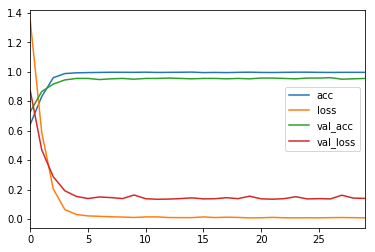

In [154]:
pd.DataFrame.from_dict(history.history).plot().show()

In [156]:
# 模型结构：词嵌入-双向GRU*2-全连接
model = Sequential()
model.add(Embedding(len(vocab)+1, 300, input_length=maxlen))
model.add(Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1, return_sequences=True)))
model.add(Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1)))
model.add(Dense(num_labels, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))
pd.DataFrame.from_dict(history.history).plot().show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 30, 300)           1793700   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 30, 512)           855552    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dense_36 (Dense)             (None, 18)                9234      
Total params: 3,839,670
Trainable params: 3,839,670
Non-trainable params: 0
_________________________________________________________________
Train on 1807 samples, validate on 393 samples
Epoch 1/30
1807/1807 [==============================] - 10s 5ms/step - loss: 1.3948 - acc: 0.6458 - val_loss: 0.9477 - val_acc: 0.7023
Epoch 2/30
1807/1807 [==============================] - 6s 4ms/step - loss: 0.6793

In [157]:
# 模型结构：词嵌入-卷积池化-GRU*2-全连接
model = Sequential()
model.add(Embedding(len(vocab)+1, 300, input_length=maxlen))
model.add(Convolution1D(256, 3, padding='same', strides = 1))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(GRU(256, dropout=0.2, recurrent_dropout=0.1, return_sequences = True))
model.add(GRU(256, dropout=0.2, recurrent_dropout=0.1))
model.add(Dense(num_labels, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))

pd.DataFrame.from_dict(history.history).plot().show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 30, 300)           1793700   
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 30, 256)           230656    
_________________________________________________________________
activation_1 (Activation)    (None, 30, 256)           0         
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 15, 256)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 15, 256)           393984    
_________________________________________________________________
gru_6 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_37 (Dense)             (None, 18)                4626      
Total para

Train on 1807 samples, validate on 393 samples
Epoch 1/30
1807/1807 [==============================] - 7s 4ms/step - loss: 1.2856 - acc: 0.6519 - val_loss: 0.7828 - val_acc: 0.7583
Epoch 2/30
1807/1807 [==============================] - 4s 2ms/step - loss: 0.5324 - acc: 0.8445 - val_loss: 0.3778 - val_acc: 0.8779
Epoch 3/30
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1771 - acc: 0.9585 - val_loss: 0.2363 - val_acc: 0.9237
Epoch 4/30
1807/1807 [==============================] - 4s 2ms/step - loss: 0.0674 - acc: 0.9840 - val_loss: 0.2379 - val_acc: 0.9364
Epoch 5/30
1807/1807 [==============================] - 4s 2ms/step - loss: 0.0318 - acc: 0.9934 - val_loss: 0.1598 - val_acc: 0.9440
Epoch 6/30
1807/1807 [==============================] - 3s 2ms/step - loss: 0.0202 - acc: 0.9939 - val_loss: 0.1441 - val_acc: 0.9466
Epoch 7/30
1807/1807 [==============================] - 3s 2ms/step - loss: 0.0137 - acc: 0.9950 - val_loss: 0.1603 - val_acc: 0.9440
Epoch 8/30
1807

AttributeError: 'AxesSubplot' object has no attribute 'show'

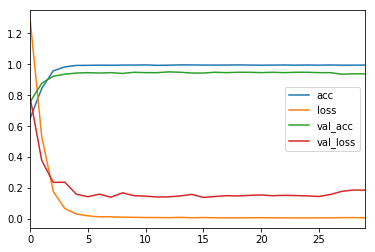

In [159]:
# 模型结构：词嵌入-卷积池化-全连接 ---拼接-全连接
#                -双向GRU-全连接
main_input = Input(shape=(maxlen,), dtype='float64')
embed = Embedding(len(vocab)+1, 300, input_length=maxlen)(main_input)
cnn = Convolution1D(256, 3, padding='same', strides = 1, activation='relu')(embed)
cnn = MaxPool1D(pool_size=4)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(256)(cnn)
rnn = Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1))(embed)
rnn = Dense(256)(rnn)
con = concatenate([cnn,rnn], axis=-1)
main_output = Dense(num_labels, activation='softmax')(con)
model = Model(inputs = main_input, outputs = main_output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))
pd.DataFrame.from_dict(history.history).plot().show()

In [166]:
# 模型结构：词嵌入*3-LSTM*2-拼接-全连接-最大化池化-全连接
# 我们需要重新整理数据集

left_train_word_ids = [[len(vocab)] + x[:-1] for x in X_train_word_ids]
left_test_word_ids = [[len(vocab)] + x[:-1] for x in X_test_word_ids]
right_train_word_ids = [x[1:] + [len(vocab)] for x in X_train_word_ids]
right_test_word_ids = [x[1:] + [len(vocab)] for x in X_test_word_ids]

# 分别对左边和右边的词进行编码
left_train_padded_seqs = pad_sequences(left_train_word_ids, maxlen=maxlen)
left_test_padded_seqs = pad_sequences(left_test_word_ids, maxlen=maxlen)
right_train_padded_seqs = pad_sequences(right_train_word_ids, maxlen=maxlen)
right_test_padded_seqs = pad_sequences(right_test_word_ids, maxlen=maxlen)

# 模型共有三个输入，分别是左词，右词和中心词
document = Input(shape = (None, ), dtype = "int32")
left_context = Input(shape = (None, ), dtype = "int32")
right_context = Input(shape = (None, ), dtype = "int32")

# 构建词向量
embedder = Embedding(len(vocab) + 1, 300, input_length = maxlen)
doc_embedding = embedder(document)
l_embedding = embedder(left_context)
r_embedding = embedder(right_context)

# 分别对应文中的公式(1)-(7)
forward = LSTM(256, return_sequences = True)(l_embedding) # 等式(1)
# 等式(2)
backward = LSTM(256, return_sequences = True, go_backwards = True)(r_embedding) 
together = concatenate([forward, doc_embedding, backward], axis = 2) # 等式(3)

semantic = TimeDistributed(Dense(128, activation = "tanh"))(together) # 等式(4)
# 等式(5)
pool_rnn = Lambda(lambda x: K.max(x, axis = 1), output_shape = (128, ))(semantic) 
output = Dense(num_labels, activation = "softmax")(pool_rnn) # 等式(6)和(7)
model = Model(inputs = [document, left_context, right_context], outputs = output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit([x_train, left_train_padded_seqs, right_train_padded_seqs], 
           y_train,
           batch_size=32,
           epochs=12,
           validation_data=([x_test, left_test_padded_seqs, right_test_padded_seqs], y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 30, 300)      1793700     input_23[0][0]                   
                                                                 input_24[0][0]                   
          

In [167]:
%matplotlibplotlib inline

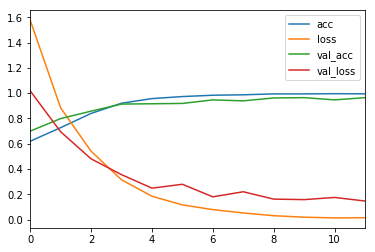

In [168]:
pd.DataFrame.from_dict(history.history).plot()

In [177]:
class Attention(Layer):
    def __init__(self, attention_size, **kwargs):
        self.attention_size = attention_size
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # W: (EMBED_SIZE, ATTENTION_SIZE)
        # b: (ATTENTION_SIZE, 1)
        # u: (ATTENTION_SIZE, 1)
        self.W = self.add_weight(name="W_{:s}".format(self.name),
                                 shape=(input_shape[-1], self.attention_size),
                                 initializer="glorot_normal",
                                 trainable=True)
        self.b = self.add_weight(name="b_{:s}".format(self.name),
                                 shape=(input_shape[1], 1),
                                 initializer="zeros",
                                 trainable=True)
        self.u = self.add_weight(name="u_{:s}".format(self.name),
                                 shape=(self.attention_size, 1),
                                 initializer="glorot_normal",
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x, mask=None):
        # input: (BATCH_SIZE, MAX_TIMESTEPS, EMBED_SIZE)
        # et: (BATCH_SIZE, MAX_TIMESTEPS, ATTENTION_SIZE)
        et = K.tanh(K.dot(x, self.W) + self.b)
        # at: (BATCH_SIZE, MAX_TIMESTEPS)
        at = K.softmax(K.squeeze(K.dot(et, self.u), axis=-1))
        if mask is not None:
            at *= K.cast(mask, K.floatx())
        # ot: (BATCH_SIZE, MAX_TIMESTEPS, EMBED_SIZE)
        atx = K.expand_dims(at, axis=-1)
        ot = atx * x
        # output: (BATCH_SIZE, EMBED_SIZE)
        output = K.sum(ot, axis=1)
        return output

    def compute_mask(self, input, input_mask=None):
        return None

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])
    
# 需要导入两个模型，分别是句子级别的和篇章级别的，以及预处理后的文本序列
def get_attention(sent_model, doc_model, sequences, topN=5):
    sent_before_att = K.function([sent_model.layers[0].input, K.learning_phase()],
                                 [sent_model.layers[2].output])
    cnt_reviews = sequences.shape[0]

    # 导出这个句子每个词的权重
    sent_att_w = sent_model.layers[3].get_weights()
    sent_all_att = []
    for i in range(cnt_reviews):
        sent_each_att = sent_before_att([sequences[i], 0])
        sent_each_att = cal_att_weights(sent_each_att, sent_att_w, model_name)
        sent_each_att = sent_each_att.ravel()
        sent_all_att.append(sent_each_att)
    sent_all_att = np.array(sent_all_att)

    doc_before_att = K.function([doc_model.layers[0].input, K.learning_phase()],
                                [doc_model.layers[2].output])
    # 找到重要的分句
    doc_att_w = doc_model.layers[3].get_weights()
    doc_sub_att = doc_before_att([sequences, 0])
    doc_att = cal_att_weights(doc_sub_att, doc_att_w, model_name)

    return sent_all_att, doc_att

# 使用numpy重新计算attention层的结果
def cal_att_weights(output, att_w, model_name):
    if model_name == 'HAN':
        eij = np.tanh(np.dot(output[0], att_w[0]) + att_w[1])
        eij = np.dot(eij, att_w[2])
        eij = eij.reshape((eij.shape[0], eij.shape[1]))
        ai = np.exp(eij)
        weights = ai / np.sum(ai)
        return weights

In [174]:
attention_size = 33

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 30)                0         
_________________________________________________________________
embedding_29 (Embedding)     (None, 30, 300)           1793700   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 30, 200)           240600    
_________________________________________________________________
attention_2 (Attention)      (None, 200)               6663      
_________________________________________________________________
dense_55 (Dense)             (None, 18)                3618      
Total params: 2,044,581
Trainable params: 2,044,581
Non-trainable params: 0
_________________________________________________________________
Train on 1807 samples, validate on 393 samples
Epoch 1/30
1807/1807 [==============================] - 7s 4ms/step - loss: 1.7160 - 

AttributeError: 'AxesSubplot' object has no attribute 'show'

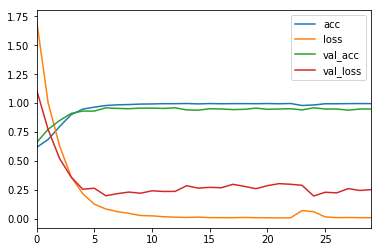

In [176]:
# 模型结构：词嵌入-双向GRU-Attention-全连接
inputs = Input(shape=(maxlen,), dtype='float64')
embed = Embedding(len(vocab) + 1,300, input_length = maxlen)(inputs)
gru = Bidirectional(GRU(100, dropout=0.2, return_sequences=True))(embed)
attention = Attention(attention_size)(gru)
output = Dense(num_labels, activation='softmax')(attention)
model = Model(inputs, output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))

pd.DataFrame.from_dict(history.history).plot().show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 25, 300)           16065600  
_________________________________________________________________
global_average_pooling1d_4 ( (None, 300)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 18)                5418      
Total params: 16,071,018
Trainable params: 16,071,018
Non-trainable params: 0
_________________________________________________________________
Train on 1807 samples, validate on 393 samples
Epoch 1/15
1807/1807 [==============================] - 12s 6ms/step - loss: 2.4744 - acc: 0.6143 - val_loss: 1.7147 - val_acc: 0.6514
Epoch 2/15
1807/1807 [==============================] - 7s 4ms/step - loss: 1.4332 - acc: 0.6309 - val_loss: 1.2065 - val_acc: 0.6514
Epoch 3/15
1807/1807 [==============================] - 7s 4ms/step - loss: 1.

AttributeError: 'AxesSubplot' object has no attribute 'show'

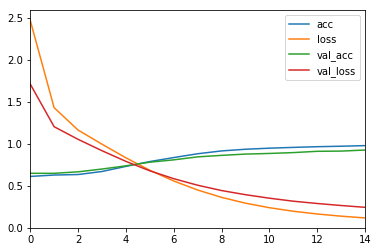

In [183]:
# 模型结构：词嵌入(n-gram)-最大化池化-全连接
# 生成n-gram组合的词(以3为例)
ngram = 3
# 将n-gram词加入到词表
def create_ngram(sent, ngram_value):
    return set(zip(*[sent[i:] for i in range(ngram_value)]))
ngram_set = set()
for sentence in x_train:
    for i in range(2, ngram+1):
        set_of_ngram = create_ngram(sentence, i)
        ngram_set.update(set_of_ngram)
# 给n-gram词汇编码
start_index = len(vocab) + 2
token_indice = {v: k + start_index for k, v in enumerate(ngram_set)} # 给n-gram词汇编码
indice_token = {token_indice[k]: k for k in token_indice}
max_features = np.max(list(indice_token.keys())) + 1
# 将n-gram词加入到输入文本的末端
def add_ngram(sequences, token_indice, ngram_range):
    new_sequences = []
    for sent in sequences:
        new_list = sent[:]
        for i in range(len(new_list) - ngram_range + 1):
            for ngram_value in range(2, ngram_range + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)
    return new_sequences

x_train = add_ngram(X_train_word_ids, token_indice, ngram)
x_test = add_ngram(X_test_word_ids, token_indice, ngram)
x_train = pad_sequences(x_train, maxlen=maxlen+10)
x_test = pad_sequences(x_test, maxlen=maxlen+10)

model = Sequential()
model.add(Embedding(max_features, 300, input_length=25))
model.add(GlobalAveragePooling1D())
model.add(Dense(num_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=15,
          validation_data=(x_test, y_test))

pd.DataFrame.from_dict(history.history).plot().show()